In [34]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [35]:
FFMPEG_DATAFRAME_LOCATION = '../../../../_local_cache/_output/delays_ffmpeg'
DECODER_DATAFRAME_LOCATION = '../../../../_local_cache/_output/delays_decoder'

In [36]:
def get_name(file):
  return file.split('camera_delays_')[1].split('.csv')[0][:-15]

In [37]:
ffmpeg_dataframe_files = os.listdir(FFMPEG_DATAFRAME_LOCATION)
ffmpeg_dataframes = []

decoder_dataframe_files = os.listdir(DECODER_DATAFRAME_LOCATION)
decoder_dataframes = []

for f in ffmpeg_dataframe_files:
    with open(os.path.join(FFMPEG_DATAFRAME_LOCATION, f), 'r') as fd:
        ffmpeg_dataframes.append((pd.read_csv(fd), get_name(f)))
for df, _ in ffmpeg_dataframes:
    # convert timestamp to datetime
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

for f in decoder_dataframe_files:
    with open(os.path.join(DECODER_DATAFRAME_LOCATION, f), 'r') as fd:
        decoder_dataframes.append((pd.read_csv(fd), get_name(f)))
for df, _ in decoder_dataframes:
    # convert timestamp to datetime
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

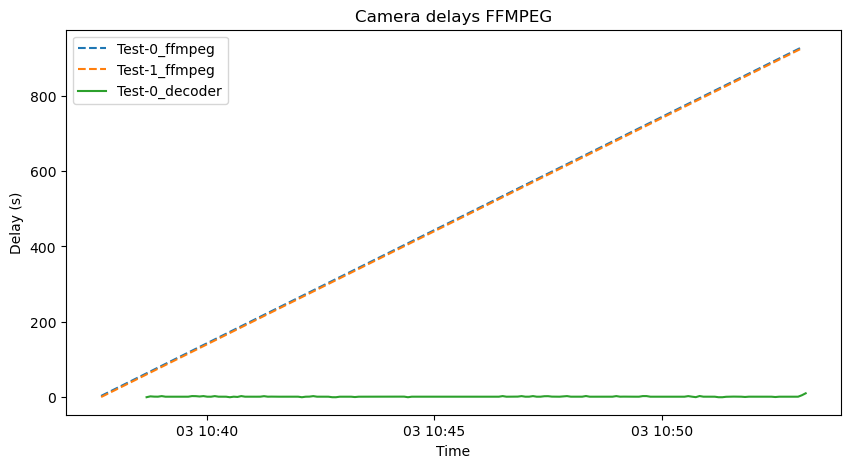

In [38]:
plt.figure(figsize=(10, 5))
for df, name in ffmpeg_dataframes:
  plt.plot(df['datetime'], df['delay'], label=f"{name}_ffmpeg", linestyle='--')
for df, name in decoder_dataframes:
  plt.plot(df['datetime'], df['delay'], label=f"{name}_decoder", linestyle='-')

plt.title('Camera delays FFMPEG')
plt.xlabel('Time')
plt.ylabel('Delay (s)')
plt.legend()
plt.show()


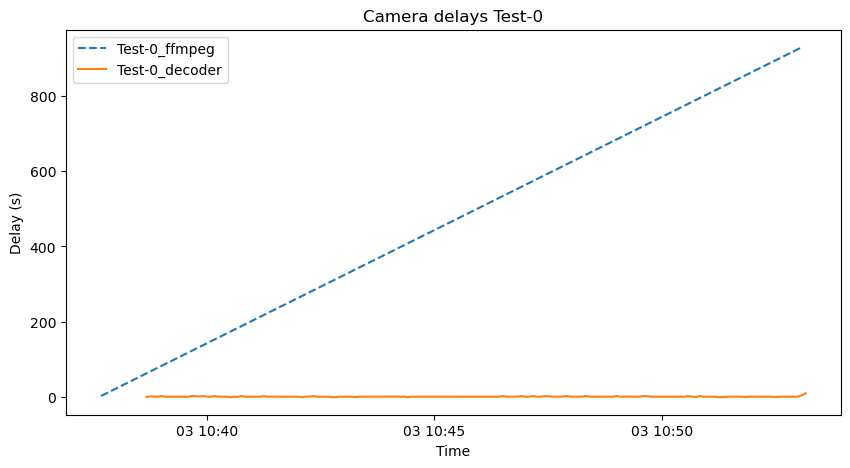

In [39]:
common_names = set([name for _, name in ffmpeg_dataframes]).intersection(set([name for _, name in decoder_dataframes]))

for name in common_names:
    plt.figure(figsize=(10, 5))
    for df, n in ffmpeg_dataframes:
        if n == name:
            plt.plot(df['datetime'], df['delay'], label=f"{n}_ffmpeg", linestyle='--')
    for df, n in decoder_dataframes:
        if n == name:
            plt.plot(df['datetime'], df['delay'], label=f"{n}_decoder", linestyle='-')
    plt.title(f'Camera delays {name}')
    plt.xlabel('Time')
    plt.ylabel('Delay (s)')
    plt.legend()
    plt.show()